# Correspondance des points d'interêts

## 1 Détection 

Algorithme GP 

## 2 Descripion 

On va associer pour chaque point d'interêt une descritption basée sur la variation locale des pixels environnants 

## 3 Association des points d'interêts

On va comparer la description de chaque PI à tous les autres pour avoir des paires de PI associées

# BRIEF(Binary Robust Independent Elementary Features)

C'est un descripteur qui va associer une empreinte à chaque PI 

K : occurence trouvée dans la base de donnée
K : occurence trouvée dans la base de donnée


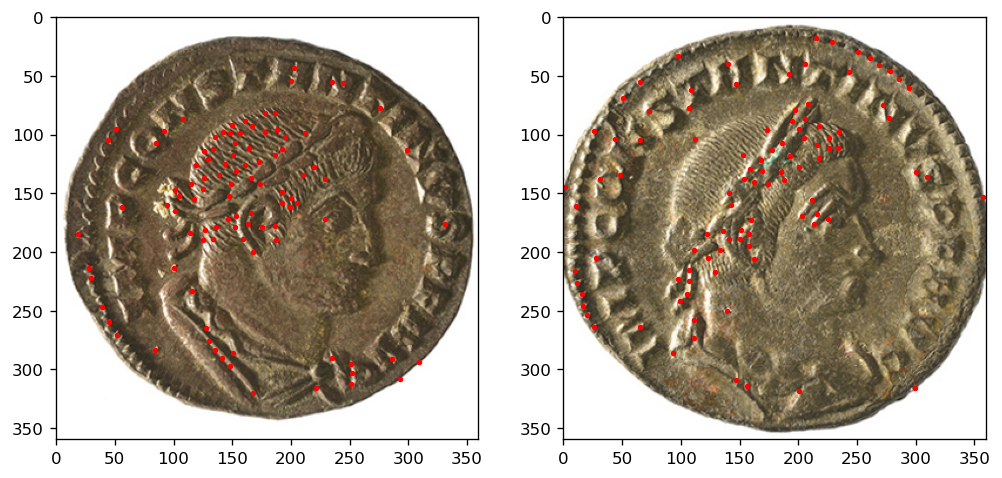

In [13]:
import os

import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse as s
import cv2

import ImageProcessing.processing as pr
import FeaturesExtractor.Kernel as k
import FeaturesExtractor.Features as f

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 120

imgPath = "data/19_Droit.jpg"

#Utilisation de ImageProcessing
img =pr.cropToCoin(imgPath)
contours = pr.getContour(img)

shape = np.shape(contours)
nbSide,b = shape

#Transformation en vecteur 1D
weightVec = np.ravel(contours)

l=7

#Calcul de K
Kw = k.getKw(weightVec,nbSide,l)
## Extracteur
ext = f.Extractor(Kw)

coordPI= ext.getCoordNFeatures(100,nbSide)

plt.subplot(1,2,1)
plt.imshow(img)
plt.scatter(coordPI[:,1],coordPI[:,0],color='r',s=5)


imgPath = "data/204_Droit.jpg"

#Utilisation de ImageProcessing
img =pr.cropToCoin(imgPath)
contours = pr.getContour(img)

weightVec = np.ravel(contours)

#Calcul de K
Kw = k.getKw(weightVec,nbSide,l)
## Extracteur
ext = f.Extractor(Kw)

coordPI= ext.getCoordNFeatures(100,nbSide)


plt.subplot(1,2,2)
plt.imshow(img)
plt.scatter(coordPI[:,1],coordPI[:,0],color='r',s=5)

plt.show()


In [11]:
img = cv2.imread(imgPath,0)
fast = cv2.FastFeatureDetector_create()

kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))

PI = cv2.KeyPoint.convert(coordPI)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'convert'
> Overload resolution failed:
>  - Can't parse 'keypoints'. Sequence item with index 0 has a wrong type
>  - Can't parse 'points2f'. Sequence item with index 0 has a wrong type
